In [1]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.5 MB/s eta 0:00:00


In [2]:
%load_ext autoreload
%autoreload 2

Be sure to add a shortcut to your drive from the Shared With Me section.
> Right Click Folder > Organize > Add Shortcut > Go to tab "All Locations" > Click "My Drive" >  Click "Add"

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_path = '/content/drive/MyDrive/math168_project/code/data/'
import sys
sys.path.append('/content/drive/MyDrive/math168_project/code/util')

Mounted at /content/drive


In [4]:
import community.community_louvain as community_louvain

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import networkx as nx
import igraph as ig
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from collections import Counter
import community as community_louvain

importing utils from folder

In [11]:
from metrics_util import *
from load_data_util import *

In [8]:
G = loadData_networkX(data_path + 'soc-sign-bitcoinotc.csv')

networkX Graph loaded.


In [9]:
g = loadData_iGraph(data_path + 'soc-sign-bitcoinotc.csv')

iGraph Graph loaded.


Negative sub-networks

In [12]:
negativeG = load_subnetwork_networkX(data_path + 'soc-sign-bitcoinotc.csv', True)

networkX Sub-Graph loaded.


In [15]:
negativeg = load_subnetwork_iGraph(data_path + 'soc-sign-bitcoinotc.csv', True)

iGraph Sub-Graph loaded.


# Similarity

## Cosine Method

In [ ]:
adjacency_matrix = nx.adjacency_matrix(G)
dense_adjacency_matrix = adjacency_matrix.todense()
# Convert it to a numpy array
adjacency_matrix_array = np.array(dense_adjacency_matrix)
adjacency_matrix_array.shape

(5881, 5881)

In [ ]:
cosine_similarity_matrix = metrics.pairwise.cosine_similarity(dense_adjacency_matrix)
cosine_similarity_matrix

array([[1.        , 0.20166965, 0.2411731 , ..., 0.        , 0.        ,
        0.        ],
       [0.20166965, 1.        , 0.32461056, ..., 0.        , 0.        ,
        0.        ],
       [0.2411731 , 0.32461056, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Pearson Coefficient

In [ ]:
np.random.seed(0)

# Create a 3x3 adjacency matrix with random entries between 1 and 10
adj_matrix = np.random.randint(1, 11, size=(3, 3))

# Print the adjacency matrix
print("Adjacency Matrix:")
print(adj_matrix)

# Create a directed graph from the adjacency matrix
A = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Draw the graph
pos = nx.spring_layout(A)  # positions for all nodes

# Draw edge labels
edge_labels = {(i, j): adj_matrix[i, j] for i, j in A.edges()}

S = np.zeros((3, 3))
for i in range(3):
  for j in range(3):
    if i == j:
      S[i, j] = 1.0
    else:
      S[i, j] = sp.stats.pearsonr(adj_matrix[i,], adj_matrix[j,]).statistic

print(S)


Adjacency Matrix:
[[ 6  1  4]
 [ 4  8 10]
 [ 4  6  3]]
[[ 1.         -0.56362148 -0.73704347]
 [-0.56362148  1.         -0.14285714]
 [-0.73704347 -0.14285714  1.        ]]


In [ ]:
def pearson_row_similarity_matrix(A):
  adj_matrix = nx.to_numpy_array(A)
  n = len(adj_matrix)
  S = np.zeros((n, n))
  for i in range(3):
    for j in range(3):
      if i == j:
        S[i, j] = 1.0
      else:
        S[i, j] = sp.stats.pearsonr(adj_matrix[i,], adj_matrix[j,]).statistic
  return S

def pearson_col_similarity_matrix(A):
  adj_matrix = nx.to_numpy_array(A)
  n = len(adj_matrix)
  S = np.zeros((n, n))
  for i in range(3):
    for j in range(3):
      if i == j:
        S[i, j] = 1.0
      else:
        S[i, j] = sp.stats.pearsonr(adj_matrix[:,i], adj_matrix[:,j]).statistic
  return S

In [ ]:
pearson = pearson_row_similarity_matrix(G)

## Jaccard Similarity

In [ ]:
def jaccard_similarity(G):
  nodes = list(G.nodes())
  jaccard_mat = np.zeros((len(nodes), len(nodes)))
  for i in range(len(nodes)):
    for j in range(len(nodes)):
      neighbors_i = set(G[nodes[i]])
      neighbors_j = set(G[nodes[j]])

      set_intersection_card = len(neighbors_i & neighbors_j)
      set_union_card = len(neighbors_i.union(neighbors_j))
      if (set_union_card == 0):
        set_union_card = 1
      jaccard_mat[i][j] = set_intersection_card/set_union_card

  return jaccard_mat

jSim = jaccard_similarity(G)

## Adamic-Adar
A measure used to compute the closeness of nodes based on their shared neighbors.

In [ ]:
# rai = nx.resource_allocation_index(G)
# not implemented for directed

adamic_adar = np.array(g.similarity_inverse_log_weighted())

# Community Detection

## Louvain method

In [ ]:
# Given a similarity matrix, return the communities defined by it

def louvain_communities(sim_matrix):
    G_sim = nx.from_numpy_array(sim_matrix)
    return nx.community.louvain_communities(G_sim)

In [ ]:
#Jaccard Similarity
louvain_jaccard_sim = louvain_communities(jSim)
#Cosine
louvain_cosine_sim = louvain_communities(cosine_similarity_matrix)
#Pearson
louvain_pearson_sim = louvain_communities(pearson)

print(louvain_jaccard_sim)

In [ ]:
print(len(louvain_jaccard_sim), len(louvain_cosine_sim), len(louvain_pearson_sim))

1231 1187 5881


In [ ]:
def louvain_communities_partition(sim_matrix):
    G_sim = nx.from_numpy_array(sim_matrix)
    return community_louvain.best_partition(G_sim, weight='weight')

In [ ]:
louvian_partition_jaccard = louvain_communities_partition(jSim)

In [ ]:
print(louvian_partition_jaccard)

{0: 26, 1: 1, 2: 1, 3: 26, 4: 26, 5: 26, 6: 2, 7: 26, 8: 3, 9: 1, 10: 26, 11: 1, 12: 4, 13: 1, 14: 1, 15: 1, 16: 5, 17: 6, 18: 6, 19: 1, 20: 1, 21: 26, 22: 1, 23: 26, 24: 1, 25: 26, 26: 1, 27: 1, 28: 1, 29: 1, 30: 17, 31: 1, 32: 26, 33: 1, 34: 1, 35: 1, 36: 26, 37: 1, 38: 26, 39: 1, 40: 6, 41: 1, 42: 1, 43: 6, 44: 6, 45: 1, 46: 17, 47: 1, 48: 1, 49: 1, 50: 26, 51: 1, 52: 1, 53: 1, 54: 1, 55: 6, 56: 1, 57: 1, 58: 1, 59: 1, 60: 26, 61: 1, 62: 1, 63: 1, 64: 1, 65: 6, 66: 26, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 8, 73: 1, 74: 26, 75: 26, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 26, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 9, 89: 1, 90: 1, 91: 26, 92: 1, 93: 26, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 10, 105: 1, 106: 1, 107: 26, 108: 26, 109: 1, 110: 11, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 26, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 26, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 26, 134: 26,

### iGraph Similarities

In [ ]:
louvain_jaccard = louvain_communities(np.array(g.similarity_jaccard()))

In [ ]:
louvain_adamic_adar = louvain_communities(adamic_adar)

In [ ]:
louvain_dice = louvain_communities(np.array(g.similarity_dice()))

In [ ]:
print(len(louvain_adamic_adar), len(louvain_jaccard), len(louvain_dice))

144 202 158


In [ ]:
print(louvain_adamic_adar)

[{0}, {11}, {12}, {14}, {18}, {22}, {24}, {27}, {30}, {38}, {40}, {42}, {43}, {48}, {49}, {50}, {58}, {59}, {63}, {67}, {73}, {82}, {84}, {85}, {90}, {91}, {92}, {98}, {102}, {117}, {118}, {121}, {123}, {124}, {126}, {128}, {130}, {136}, {151}, {226}, {1078}, {512, 513, 509, 510}, {568}, {1096, 1056, 1059, 1055}, {1088, 1089, 1079, 1080, 1081, 1082, 1083, 1085, 1086, 1087}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 17, 19, 20, 21, 23, 25, 29, 31, 32, 34, 35, 36, 37, 39, 41, 44, 45, 46, 47, 52, 53, 54, 55, 56, 60, 61, 62, 64, 66, 68, 71, 72, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 88, 89, 93, 94, 97, 99, 100, 101, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114, 116, 119, 120, 122, 125, 127, 129, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 187, 189, 190, 191, 192, 193, 194, 19

## Spectural Clustering

In [ ]:
def spectralClustering(sim_matrix):
  sc = SpectralClustering(7, affinity='precomputed', n_init=100, assign_labels='discretize')
  sc.fit(sim_matrix)
  return sc
# Compare ground-truth and clustering-results
# print('spectral clustering')
# print(sc.labels_)
# print('just for better-visualization: invert clusters (permutation)')
# print(np.abs(sc.labels_ - 1))

# # Calculate some clustering metrics
# print(metrics.adjusted_rand_score(gt, sc.labels_))
# print(metrics.adjusted_mutual_info_score(gt, sc.labels_))

# Visualizations

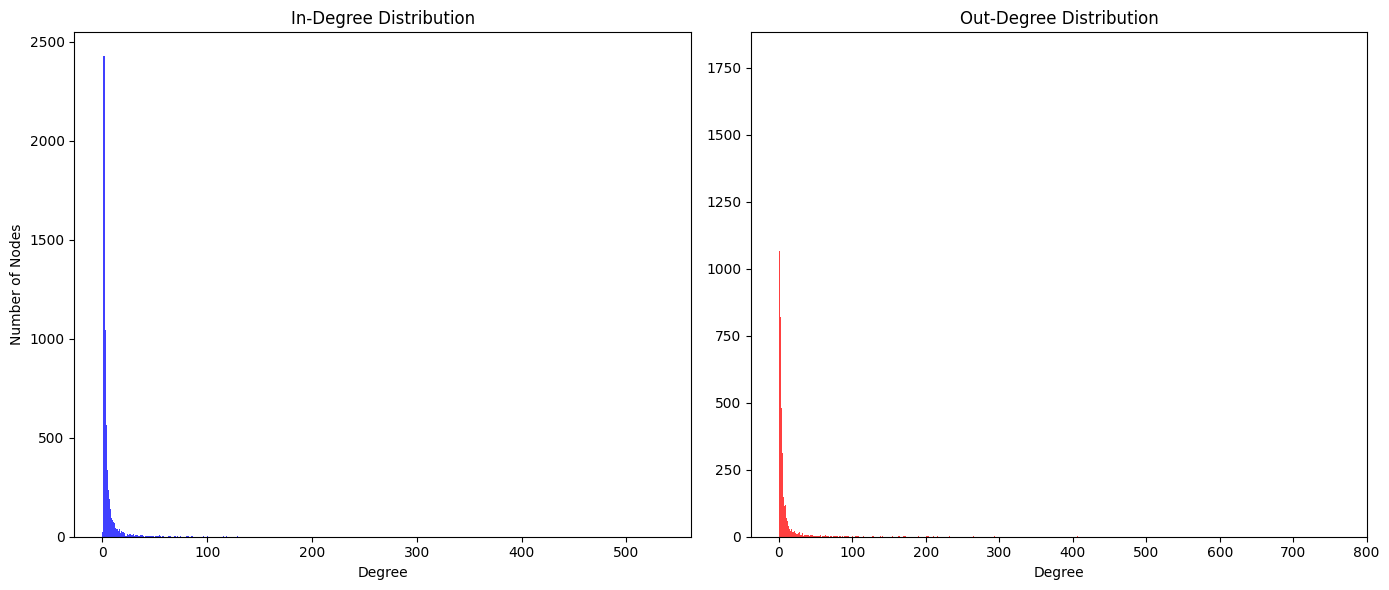

In [ ]:
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), alpha=0.75, color='blue')
plt.title('In-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.subplot(122)
plt.hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), alpha=0.75, color='red')
plt.title('Out-Degree Distribution')
plt.xlabel('Degree')

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(15, 15))

# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, node_color='cyan', node_size=5, alpha=0.1)
# nx.draw_networkx_edges(G, pos, width=2.0, alpha=1)

# nx.draw_networkx(G,node_color = 'cyan')
# plt.show()
